<a href="https://colab.research.google.com/github/ganesh000001/Machine-Learning/blob/main/Welcome_To_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

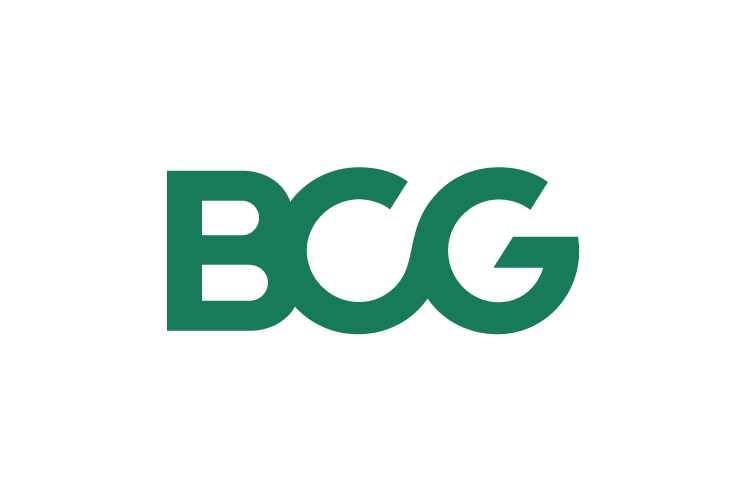

The Datasets
The dataset ml_case_training_output.csv named as pco_output contains:

*   id: contact id
*   churn: has the client churned over the next 3 months

The dataset ml_case_training_hist_data.csv named as pco_hist contains the history of energy and power consumption per client:

*   id: contact id
*   price_date: reference date
*   price_p1_var: price of energy for the 1st period
*   price_p2_var: price of energy for the 2nd period
*   price_p3_var: price of energy for the 3rd period
*   price_p1_fix: price of power for the 1st period
*   price_p2_fix: price of power for the 2nd period
*   price_p3_fix: price of power for the 3rd period


The dataset `ml_case_training_data.csv` contains:
>* `id`: contact id
* `activity_new`: category of the company's activity. 419 unique values, remove `NaN`
* `campaign_disc_elec`: code of the electricity campaign the customer last subscribed to. 0 non-null
* `channel_sales`: code of the sales channel
* `cons_12m`: electricity consumption of the past 12 months
* `cons_gas_12m`: gas consumption of the past 12 months
* `cons_last_month`: electricity consupmtion of the last month
* `date_activ`: date of activation of the contract
* `date_end`: registered date of the end of the contract
* `date_first_activ`: date of first contract of the client
* `date_modif_prod`: date of last modification of the product
*  `date_renewal`: date of the next contract renewal
* `forecast_base_bill_ele`: forecasted electricity bill baseline for next month
* `forecast_base_bill_year`: forecasted electricity bill baseline for calendar year
* `forecast_bill_12m`: forecasted electricity bill baseline for 12 months
* `forecast_cons`: forecasted electricity consumption for next month
* `forecast_cons_12m`: forecasted electricity consumption for next 12 months
* `forecast_cons_year`: forecasted electricity consumption for next calendar year
* `forecast_discount_energy`: forecasted value of current discount
* `forecast_meter_rent_12m`: forecasted bill of meter rental for the next 12 months
* `forecast_price_energy_p1`: forecasted energy price for 1st period
* `forecast_price_energy_p2`: forecasted energy price for 2nd period
* `forecast_price_pow_p1`: forecasted power price for 1st period
* `has_gas`: indicated if client is also a gas client
* `imp_cons`: current paid consumption
* `margin_gross_pow_ele`: gross margin on power subscription
* `margin_net_pow_ele`: net margin on power subscription
* `nb_prod_act`: number of active products and services
* `net_margin`: total net margin
* `num_years_antig`: antiquity of the client (in number of years)
* `origin_up`: code of the electricity campaign the customer first subscribed to
* `pow_max`: subscribed power








**Importing Libraries and Datasets**

In this section we import the libraries of interest as well as the datasets.


In [52]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
from scipy.stats import zscore as zscore

In [12]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [15]:
pco_main = pd.read_csv('/gdrive/MyDrive/Colab Notebooks/BCG Task/ml_case_training_data.csv')
pco_hist = pd.read_csv('/gdrive/MyDrive/Colab Notebooks/BCG Task/ml_case_training_hist_data.csv')
pco_output = pd.read_csv('/gdrive/MyDrive/Colab Notebooks/BCG Task/ml_case_training_output.csv')

In [16]:
pco_main

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,2012-11-07,2015-11-09,NaN,NaN,NaN,NaN,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.80,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,NaN,2015-06-23,NaN,NaN,NaN,NaN,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,2009-08-21,2015-08-31,NaN,NaN,NaN,NaN,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,2010-04-16,2015-04-17,NaN,NaN,NaN,NaN,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,2010-03-30,2015-03-31,NaN,NaN,NaN,NaN,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16091,18463073fb097fc0ac5d3e040f356987,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,NaN,2015-05-08,2014-05-26,NaN,NaN,NaN,NaN,4648.01,0,0.0,18.57,0.138305,0.000000,44.311378,t,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000
16092,d0a6f71671571ed83b2645d23af6de00,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2012-08-27,2015-08-28,68.64,68.64,1254.65,15.94,631.69,181,0.0,144.03,0.100167,0.091892,58.995952,f,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000
16093,10e6828ddd62cbcf687cb74928c4c2d2,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,NaN,2012-02-08,2015-02-09,NaN,NaN,NaN,NaN,190.39,179,0.0,129.60,0.116900,0.100015,40.606701,f,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935
16094,1cf20fd6206d7678d5bcafd28c53b4db,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,NaN,2012-08-30,2015-08-31,NaN,NaN,NaN,NaN,19.34,0,0.0,7.18,0.145711,0.000000,44.311378,f,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000


In [19]:
pco_main.describe()

,campaign_disc_ele,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max
count,0.0,1.609600e+04,1.609600e+04,1.609600e+04,3508.000000,3508.000000,3508.000000,3508.000000,16096.000000,16096.000000,15970.000000,16096.000000,15970.000000,15970.000000,15970.000000,16096.000000,16083.000000,16083.000000,16096.000000,16081.000000,16096.000000,16093.000000
mean,NaN,1.948044e+05,3.191164e+04,1.946154e+04,335.843857,335.843857,3837.441866,206.845165,2370.555949,1907.347229,0.991547,70.309945,0.135901,0.052951,43.533496,196.123447,22.462276,21.460318,1.347788,217.987028,5.030629,20.604131
std,NaN,6.795151e+05,1.775885e+05,8.235676e+04,649.406000,649.406000,5425.744327,455.634288,4035.085664,5257.364759,5.160969,79.023251,0.026252,0.048617,5.212252,494.366979,23.700883,27.917349,1.459808,366.742030,1.676101,21.772421
min,NaN,-1.252760e+05,-3.037000e+03,-9.138600e+04,-364.940000,-364.940000,-2503.480000,0.000000,-16689.260000,-85627.000000,0.000000,-242.960000,0.000000,0.000000,-0.122184,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000
25%,NaN,5.906250e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1158.175000,0.000000,513.230000,0.000000,0.000000,16.230000,0.115237,0.000000,40.606701,0.000000,11.960000,11.950000,1.000000,51.970000,4.000000,12.500000
50%,NaN,1.533250e+04,0.000000e+00,9.010000e+02,162.955000,162.955000,2187.230000,42.215000,1179.160000,378.000000,0.000000,19.440000,0.142881,0.086163,44.311378,44.465000,21.090000,20.970000,1.000000,119.680000,5.000000,13.856000
75%,NaN,5.022150e+04,0.000000e+00,4.127000e+03,396.185000,396.185000,4246.555000,228.117500,2692.077500,1994.250000,0.000000,131.470000,0.146348,0.098837,44.311378,218.090000,29.640000,29.640000,1.000000,275.810000,6.000000,19.800000
max,NaN,1.609711e+07,4.188440e+06,4.538720e+06,12566.080000,12566.080000,81122.630000,9682.890000,103801.930000,175375.000000,50.000000,2411.690000,0.273963,0.195975,59.444710,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000


In [17]:
pco_hist

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000
...,...,...,...,...,...,...,...,...
192997,16f51cdc2baa19af0b940ee1b3dd17d5,2015-08-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192998,16f51cdc2baa19af0b940ee1b3dd17d5,2015-09-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192999,16f51cdc2baa19af0b940ee1b3dd17d5,2015-10-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
193000,16f51cdc2baa19af0b940ee1b3dd17d5,2015-11-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555


In [18]:
pco_output

,id,churn
0,48ada52261e7cf58715202705a0451c9,0
1,24011ae4ebbe3035111d65fa7c15bc57,1
2,d29c2c54acc38ff3c0614d0a653813dd,0
3,764c75f661154dac3a6c254cd082ea7d,0
4,bba03439a292a1e166f80264c16191cb,0
...,...,...
16091,18463073fb097fc0ac5d3e040f356987,0
16092,d0a6f71671571ed83b2645d23af6de00,1
16093,10e6828ddd62cbcf687cb74928c4c2d2,1
16094,1cf20fd6206d7678d5bcafd28c53b4db,0


**The Output Dataset**

From the output dataset we can derive a quick insight on customer retention.



In [27]:
# Replace the churn column with appropiate labels
pco_output['churn'] = pco_output['churn'].replace({0:'Stayed',1:'Churned'})

In [28]:
pco_output.head()

,id,churn
0,48ada52261e7cf58715202705a0451c9,Stayed
1,24011ae4ebbe3035111d65fa7c15bc57,Churned
2,d29c2c54acc38ff3c0614d0a653813dd,Stayed
3,764c75f661154dac3a6c254cd082ea7d,Stayed
4,bba03439a292a1e166f80264c16191cb,Stayed


In [31]:
# What number of customers have churned in the last 3 months?
attrition_count = pco_output['churn'].value_counts()
print('Total Number of Churned Customers:\n', attrition_count)

Total Number of Churned Customers:
 Stayed     14501
Churned     1595
Name: churn, dtype: int64


In [32]:
# What is the proportion of customer attrition in the last 3 months?
attrition_rate = pco_output['churn'].value_counts() / pco_output.shape[0] * 100
print('Attrition rate: \n', attrition_rate)

Attrition rate: 
 Stayed     90.090706
Churned     9.909294
Name: churn, dtype: float64


###**Facts**
* In the last 3 months 1,595 customers have churned
* There are currently 14,501 active clients
* Customer retention is 90% in the last 3 months 
* Customer attrition is 10% in the last 3 months

In [33]:
# Display the yearly consumption of energy and power of customers
pco_hist.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [34]:
# Examing the structure of the dataframe
pco_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            193002 non-null  object 
 1   price_date    193002 non-null  object 
 2   price_p1_var  191643 non-null  float64
 3   price_p2_var  191643 non-null  float64
 4   price_p3_var  191643 non-null  float64
 5   price_p1_fix  191643 non-null  float64
 6   price_p2_fix  191643 non-null  float64
 7   price_p3_fix  191643 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [35]:
# Examine the descriptive statistics of the dataframe
pco_hist.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000
mean,0.140991,0.054412,0.030712,43.325546,10.698201,6.455436
std,0.025117,0.050033,0.036335,5.437952,12.856046,7.782279
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101780,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [36]:
# Identify the nullity of the dataframe
missing_values_hist = pco_hist.isna().sum()
print('Total Missing Values:\n', missing_values_hist)

Total Missing Values:
 id                 0
price_date         0
price_p1_var    1359
price_p2_var    1359
price_p3_var    1359
price_p1_fix    1359
price_p2_fix    1359
price_p3_fix    1359
dtype: int64


In [37]:
# Identify the percentage of nullity in the dataframe for each collumn
missing_values_hist_perc = pco_hist.isnull().mean() * 100
print('Percentage of Missing Values:\n', missing_values_hist_perc)

Percentage of Missing Values:
 id              0.000000
price_date      0.000000
price_p1_var    0.704138
price_p2_var    0.704138
price_p3_var    0.704138
price_p1_fix    0.704138
price_p2_fix    0.704138
price_p3_fix    0.704138
dtype: float64


---
###**Facts**

* The average price of energy for the 1st period was: $0.14
* The average price of energy for the 2nd period was: \$0.05
* The average price of energy for the 3rd period was: \$0.03

*The average price of energy was declining in the last year*.

* The average power of power for the 1st period was: \$43.32
* The average power of power for the 2nd period was: \$10.69
* The average power of power for the 3rd period was: \$6.45

*The average price of power was declining in the last year*.

---
###**Observations**
* The columns `price_p1_fix`, `price_p2_fix`, and `price_p3_fix` contain negative values. *These negative prices of power do not make sense.* 

* The dataset `pco_hist` contains 1359 rows displaying `NaN` values on 6 variables except for `id` and `price_date`.

* The `price_..._var` and `price_..._fix` columns are missing **0.704%** of the data in each of them.

Note: `Pandas` *recognizes these* `NaN` *values and removes them when displaying descriptives statistics*.

*Notice how the price of energy has a minimum value of zero. Perhaps some customers churned thereby making the consumption of energy zero.*

---

##**The Main Dataset**

This dataset contain more characteristics about each client's account and activity.

In [38]:
# Print header
pco_main.head()

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,2012-11-07,2015-11-09,NaN,NaN,NaN,NaN,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,NaN,2015-06-23,NaN,NaN,NaN,NaN,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,2009-08-21,2015-08-31,NaN,NaN,NaN,NaN,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,2010-04-16,2015-04-17,NaN,NaN,NaN,NaN,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,2010-03-30,2015-03-31,NaN,NaN,NaN,NaN,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200


In [39]:
# printo info
pco_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16096 non-null  object 
 1   activity_new              6551 non-null   object 
 2   campaign_disc_ele         0 non-null      float64
 3   channel_sales             11878 non-null  object 
 4   cons_12m                  16096 non-null  int64  
 5   cons_gas_12m              16096 non-null  int64  
 6   cons_last_month           16096 non-null  int64  
 7   date_activ                16096 non-null  object 
 8   date_end                  16094 non-null  object 
 9   date_first_activ          3508 non-null   object 
 10  date_modif_prod           15939 non-null  object 
 11  date_renewal              16056 non-null  object 
 12  forecast_base_bill_ele    3508 non-null   float64
 13  forecast_base_bill_year   3508 non-null   float64
 14  foreca

In [40]:
# Identify the percentage of nullity in the dataframe for each collumn
missing_values_main_perc = pco_main.isnull().mean() * 100
print('Percentage of Missing Values:\n', missing_values_main_perc)

Percentage of Missing Values:
 id                            0.000000
activity_new                 59.300447
campaign_disc_ele           100.000000
channel_sales                26.205268
cons_12m                      0.000000
cons_gas_12m                  0.000000
cons_last_month               0.000000
date_activ                    0.000000
date_end                      0.012425
date_first_activ             78.205765
date_modif_prod               0.975398
date_renewal                  0.248509
forecast_base_bill_ele       78.205765
forecast_base_bill_year      78.205765
forecast_bill_12m            78.205765
forecast_cons                78.205765
forecast_cons_12m             0.000000
forecast_cons_year            0.000000
forecast_discount_energy      0.782803
forecast_meter_rent_12m       0.000000
forecast_price_energy_p1      0.782803
forecast_price_energy_p2      0.782803
forecast_price_pow_p1         0.782803
has_gas                       0.000000
imp_cons                      0.0

In [41]:
# Examine the descriptive statistics of the main dataset
pco_main.describe()

,campaign_disc_ele,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max
count,0.0,1.609600e+04,1.609600e+04,1.609600e+04,3508.000000,3508.000000,3508.000000,3508.000000,16096.000000,16096.000000,15970.000000,16096.000000,15970.000000,15970.000000,15970.000000,16096.000000,16083.000000,16083.000000,16096.000000,16081.000000,16096.000000,16093.000000
mean,NaN,1.948044e+05,3.191164e+04,1.946154e+04,335.843857,335.843857,3837.441866,206.845165,2370.555949,1907.347229,0.991547,70.309945,0.135901,0.052951,43.533496,196.123447,22.462276,21.460318,1.347788,217.987028,5.030629,20.604131
std,NaN,6.795151e+05,1.775885e+05,8.235676e+04,649.406000,649.406000,5425.744327,455.634288,4035.085664,5257.364759,5.160969,79.023251,0.026252,0.048617,5.212252,494.366979,23.700883,27.917349,1.459808,366.742030,1.676101,21.772421
min,NaN,-1.252760e+05,-3.037000e+03,-9.138600e+04,-364.940000,-364.940000,-2503.480000,0.000000,-16689.260000,-85627.000000,0.000000,-242.960000,0.000000,0.000000,-0.122184,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000
25%,NaN,5.906250e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1158.175000,0.000000,513.230000,0.000000,0.000000,16.230000,0.115237,0.000000,40.606701,0.000000,11.960000,11.950000,1.000000,51.970000,4.000000,12.500000
50%,NaN,1.533250e+04,0.000000e+00,9.010000e+02,162.955000,162.955000,2187.230000,42.215000,1179.160000,378.000000,0.000000,19.440000,0.142881,0.086163,44.311378,44.465000,21.090000,20.970000,1.000000,119.680000,5.000000,13.856000
75%,NaN,5.022150e+04,0.000000e+00,4.127000e+03,396.185000,396.185000,4246.555000,228.117500,2692.077500,1994.250000,0.000000,131.470000,0.146348,0.098837,44.311378,218.090000,29.640000,29.640000,1.000000,275.810000,6.000000,19.800000
max,NaN,1.609711e+07,4.188440e+06,4.538720e+06,12566.080000,12566.080000,81122.630000,9682.890000,103801.930000,175375.000000,50.000000,2411.690000,0.273963,0.195975,59.444710,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000


---
### **Facts**
* The average tenure of a client is 5 years
* The average net marging is $217
---
### **Observations**
* The 14 columns contain negative minimum values

* The `activity_new` column is missing 59.3% of its data
* The `campaign_disc_ele` column is missing completely
* The `channel_sales` column is missing 26.2% of its data
* The `date_end` column is missing 0.01% of its data
* The `date_first_activ_` column is missing 78.2% of its data
* The `date_modif_prod` column is missing 0.9% of its data
* The `date_renewal` column is missing 0.24% of it data
* The `marging_gross_pow_ele` and `margin_net_pow_ele` columns are both missing 0.08% of its data
* The `net_margin` column is missing 0.09% of its data
* The `origin_up` column is missing 0.54% of its data
* The `pow_max` column is missing 0.018% of its data
* The `forecast_base_bill_ele`, `forecast_base_bill_year`, `forecast_bill_12m`, and `forecast_cons` columns are each missing 78.2% of its data

---

# **Data Cleaning and Imputation**


## **Dealing with missing data**

**Workflow for treating missing values**

1. Convert all missing values to null values
2. Analyze the amount and type of missingness in the data
3. Appropriately delete or impute missing values
4. Evaluate & compare the performance of the treated/imputed dataset

---
The `missingno` (imported as `msno`) package is great for visualizing missing data - we will be using:

- `msno.matrix()` visualizes a missingness matrix
- `msno.bar()` visualizes a missngness barplot
- `plt.show()` to show the plot

###**Is the data missing at random?**

**Types of missingness**

1. Missing Completely at Random (MCAR)
> *Missingness has no relationship between any values, observed or missing*
2. Missing at Random (MAR)
> *There is a systematic relationship between missingness and other observed data, but not the missing data*
3. Missing Not at Random (MNAR)
> *There is a relationship between missingness and its values, missing or non-missing*

###**When and how to delete missing data?**

**Types of deletions**
1. Pairwise deletion
>Pandas skips `NaN` whic is equivalent to pairwise deletion. Pairwise deletions minimize the amount of data loss and are hence preferred. However, it is also true that at several instances they might negatively affect our analysis. 
2. Listwise deletion
> In listwise deletion the incomplete row is deleted, also called complete case analysis. The major disadvantage of listwise deletions is amount of data lost. 
>Example: `df.dropna(subset=['column'], how='any',inplace=True)`


Note: *Both of these deletions are used only when the values are missing completely at random that is MCAR*

##**The History Dataset**

In [42]:
# Identify negative columns
negative_cols = ['price_p1_fix','price_p2_fix','price_p3_fix']

# Convert to positive the negative columns in pco_hist
pco_hist[negative_cols] = pco_hist[negative_cols].apply(abs)

pco_hist.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000
mean,0.140991,0.054412,0.030712,43.325563,10.698210,6.455443
std,0.025117,0.050033,0.036335,5.437816,12.856039,7.782273
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101780,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


### **Visualizing the amount of missingness**

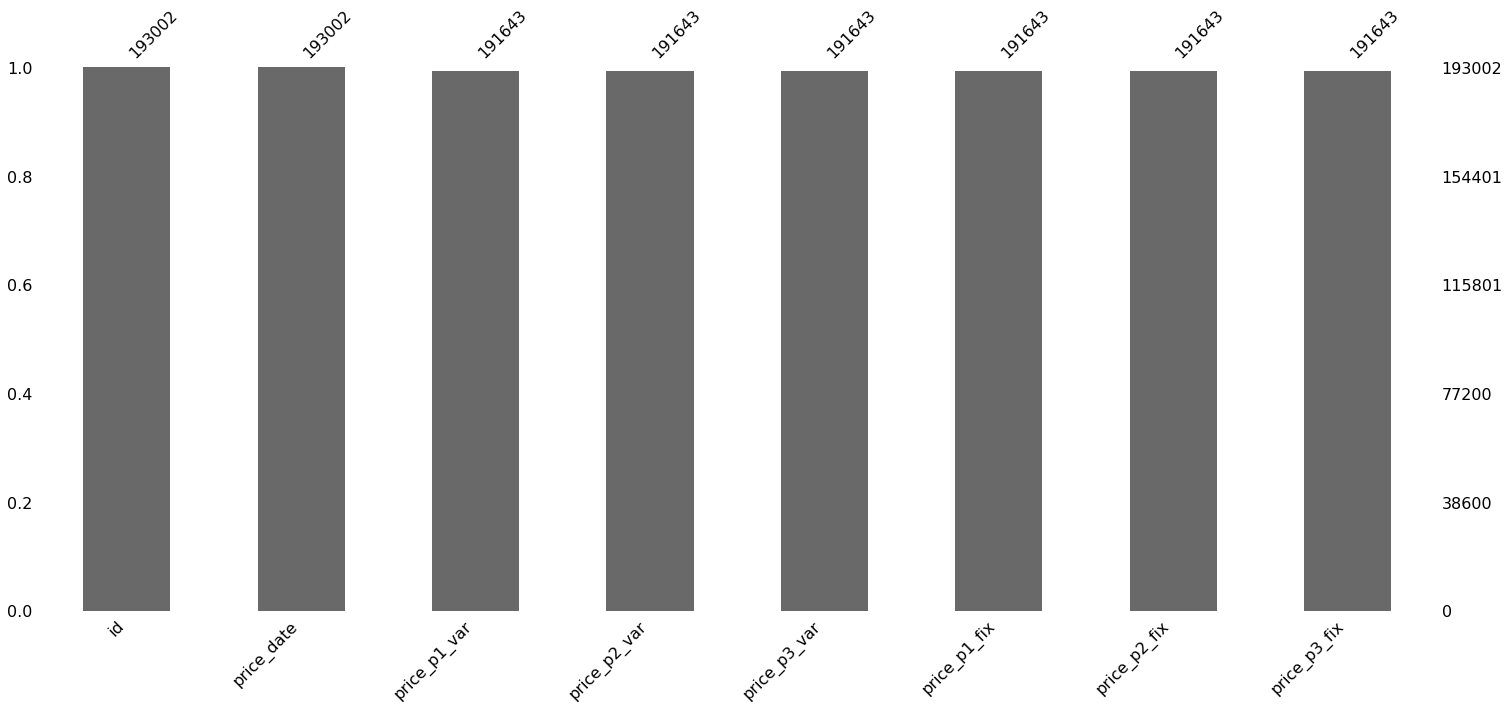

In [53]:
# Visualize the completeness of the dataframe
# Visualize the completeness of the dataframe
msno.bar(pco_hist)

To the untrained eye, it might seem that there's no data missing. However, we estimated that 0.7% of the data in the price columns are missing. We can notice that the value counts at the top of each columns display a different amount.

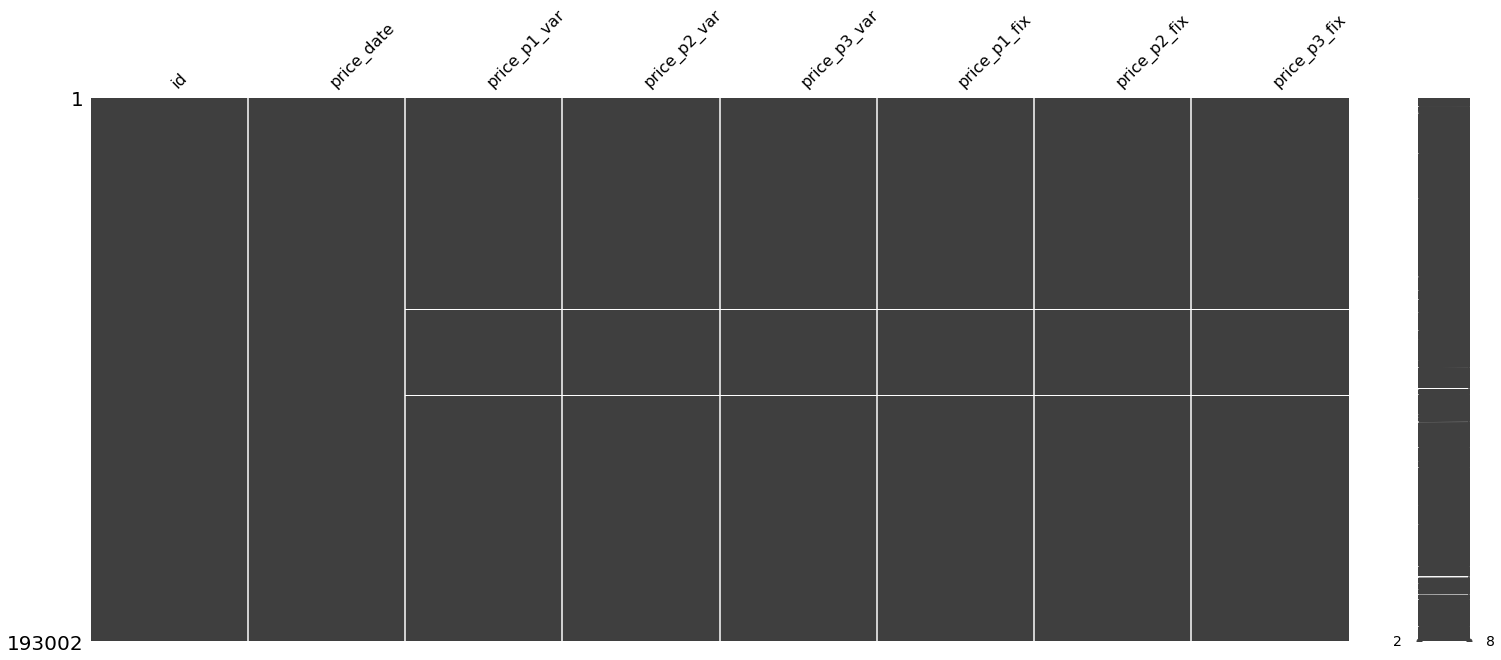

In [54]:
# Visualize the locations of the missing values of the dataset
sorted = pco_hist.sort_values(by = ['id','price_date'])
msno.matrix(sorted)

The nullity matrix describes the nullity of the dataset and appears blank wherever there are missing values. 

The column on the very right summarizes the general shape of the data completeness and points out the row. Total count of columns at the bottom right.

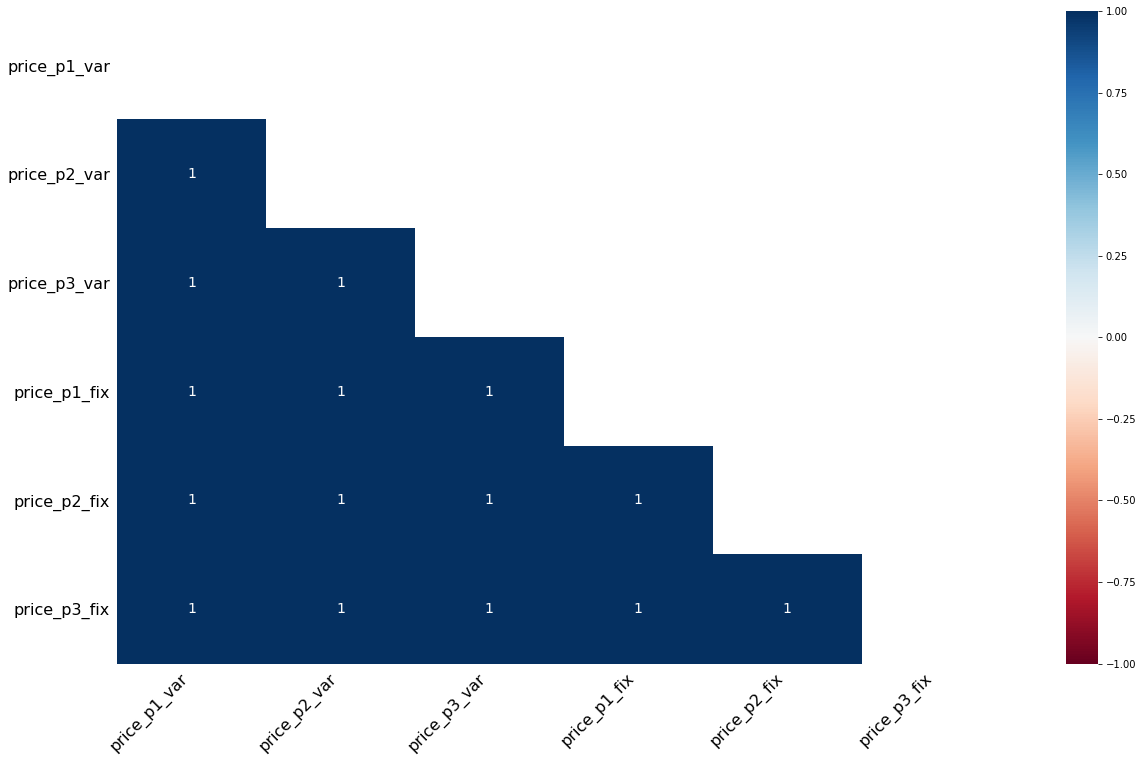

In [55]:
# Visualize the correlation between the numeric variables of the dataframe
msno.heatmap(pco_hist)

In [56]:
# Identify the index of the IDs containing missing values.
hist_NAN_index = pco_hist[pco_hist.isnull().any(axis=1)].index.values.tolist()

# Obtain a dataframe with the missing values
pco_hist_missing = pco_hist.iloc[hist_NAN_index,:]

# Glimpse at the NaN cases of the pco_hist dataset
pco_hist_missing.head(10)

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
75,ef716222bbd97a8bdfcbb831e3575560,2015-04-01,NaN,NaN,NaN,NaN,NaN,NaN
221,0f5231100b2febab862f8dd8eaab3f43,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
377,2f93639de582fadfbe3e86ce1c8d8f35,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
413,f83c1ab1ca1d1802bb1df4d72820243c,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
461,3076c6d4a060e12a049d1700d9b09cf3,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
471,33bb3af90650ac2e9ecac6ff2c975a6b,2015-04-01,NaN,NaN,NaN,NaN,NaN,NaN
472,33bb3af90650ac2e9ecac6ff2c975a6b,2015-05-01,NaN,NaN,NaN,NaN,NaN,NaN
475,33bb3af90650ac2e9ecac6ff2c975a6b,2015-08-01,NaN,NaN,NaN,NaN,NaN,NaN
476,33bb3af90650ac2e9ecac6ff2c975a6b,2015-09-01,NaN,NaN,NaN,NaN,NaN,NaN
874,0e90101b08183cc9548e827e4b256f47,2015-12-01,NaN,NaN,NaN,NaN,NaN,NaN


#### **Filling Time Series Data**

In [57]:
# extract the unique dates of missing data
date_lst = pco_hist_missing['price_date'].unique()
id_lst = pco_hist_missing['id'].unique()

# Create a time dataframe with the unique dates
time_df = pd.DataFrame(data=date_lst, columns=['price_date'] )

# Glimpse the time dataframe
time_df.sort_values(by=['price_date'])

,price_date
9,2015-01-01
11,2015-02-01
8,2015-03-01
0,2015-04-01
2,2015-05-01
1,2015-06-01
10,2015-07-01
3,2015-08-01
4,2015-09-01
7,2015-10-01


---
###**Facts**

* There is high correlation between the missingness in the numeric columns and is values, missing or non-missing
* There are 1359 clients who are missing price data at least in 1 month

---
###**Observations** 

* After sorting the `pco_hist` dataset by `id` and `price_date`, we found that some columns are likely to be **MNAR**.
* The columns containing prices display strong positive correlation  in the missingness suggests a case of **MNAR**. 
* This event suggest that multicolinearity might be present in the dataset.

### **Imputations**

Imputing time-series data requires a specialized treatment. Time-series data usually comes with special characteristics such trend, seasonality and cyclicality of which we can exploit when imputing missing values in the data.

In this particular dataset, there's not such thing as seasonality because it only has monthly data for one year.

#### **Filling Time Series Data**

In [58]:
# Make a copy of pco_hist dataset
pco_hist_ff = pco_hist.copy(deep=True)

# Print prior to imputing missing values
print(pco_hist_ff.iloc[hist_NAN_index,3:9].head())

     price_p2_var  price_p3_var  price_p1_fix  price_p2_fix  price_p3_fix
75            NaN           NaN           NaN           NaN           NaN
221           NaN           NaN           NaN           NaN           NaN
377           NaN           NaN           NaN           NaN           NaN
413           NaN           NaN           NaN           NaN           NaN
461           NaN           NaN           NaN           NaN           NaN


In [59]:
# Fill NaNs using forward fill
pco_hist_ff.fillna(method = 'ffill', inplace=True)

print(pco_hist_ff.iloc[hist_NAN_index,3:9].head())

     price_p2_var  price_p3_var  price_p1_fix  price_p2_fix  price_p3_fix
75       0.000000      0.000000     44.266931      0.000000      0.000000
221      0.000000      0.000000     44.266931      0.000000      0.000000
377      0.087970      0.000000     44.266931      0.000000      0.000000
413      0.102239      0.070381     40.565969     24.339581     16.226389
461      0.000000      0.000000     44.266931      0.000000      0.000000


In [60]:
pco_hist_ff.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141006,0.054376,0.030689,43.326213,10.689406,6.450494
std,0.025091,0.050040,0.036333,5.431161,12.853850,7.781323
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085450,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101780,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [61]:
# Merge output dataset with historical forward fill dataset
pco_hist_ff_merged = pco_hist_ff.merge(right=pco_output,on=['id'])
pco_hist_ff_merged.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0,Stayed
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0,Stayed
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0,Stayed
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0,Stayed
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0,Stayed


## **The Main Dataset**

### **Visualizing the amount of missingness**

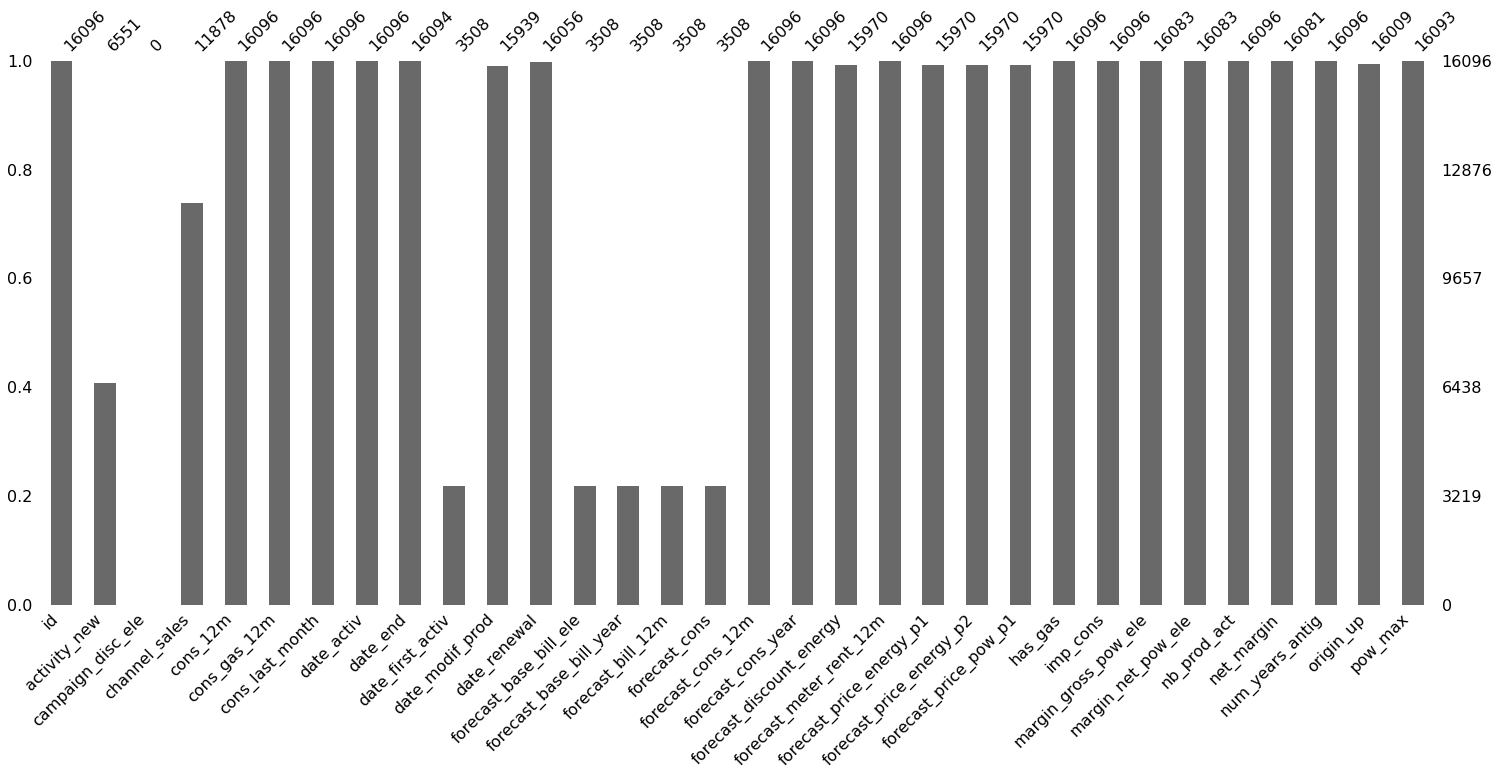

In [62]:
# Visualize the completeness of the dataframe
msno.bar(pco_main)

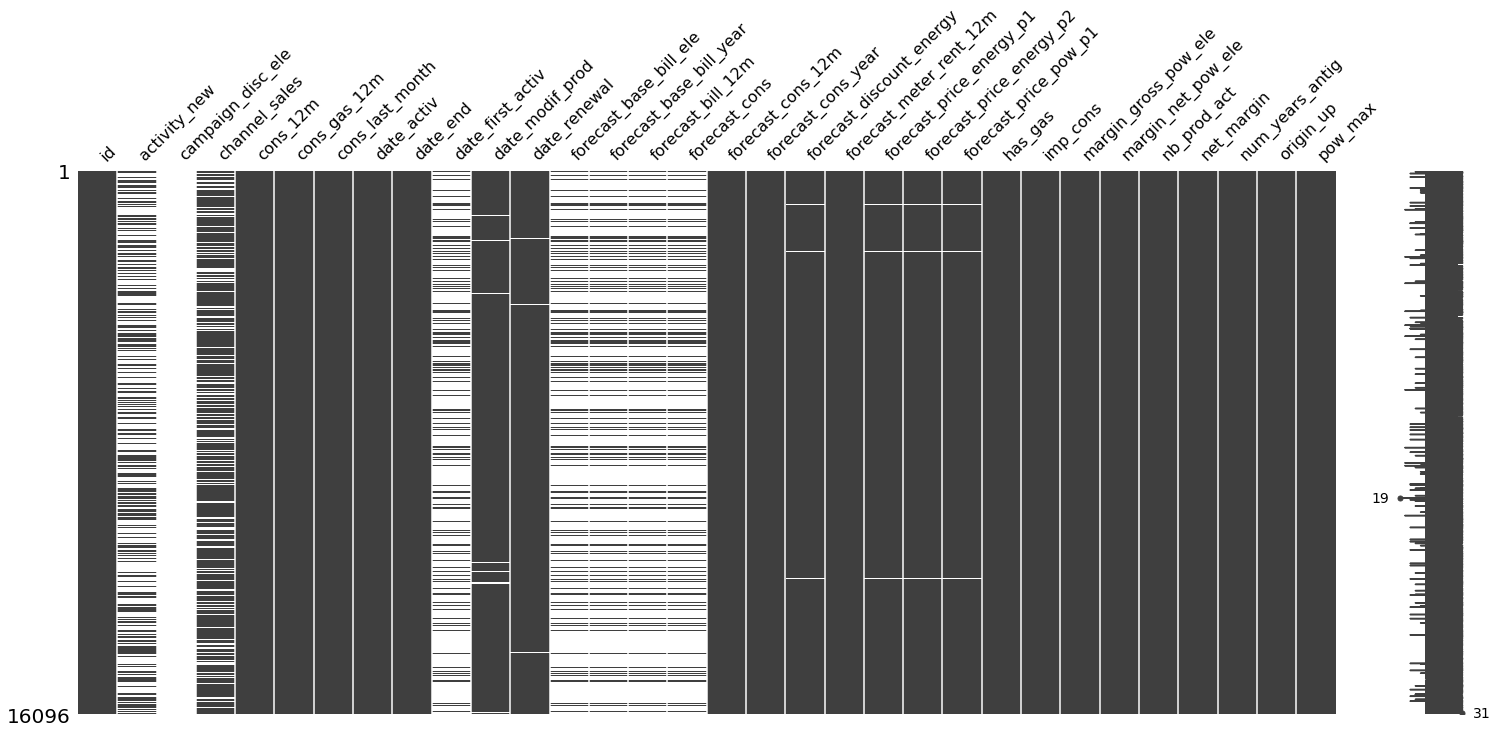

In [63]:
# Visualize the locations of the missing values of the dataset
msno.matrix(pco_main)

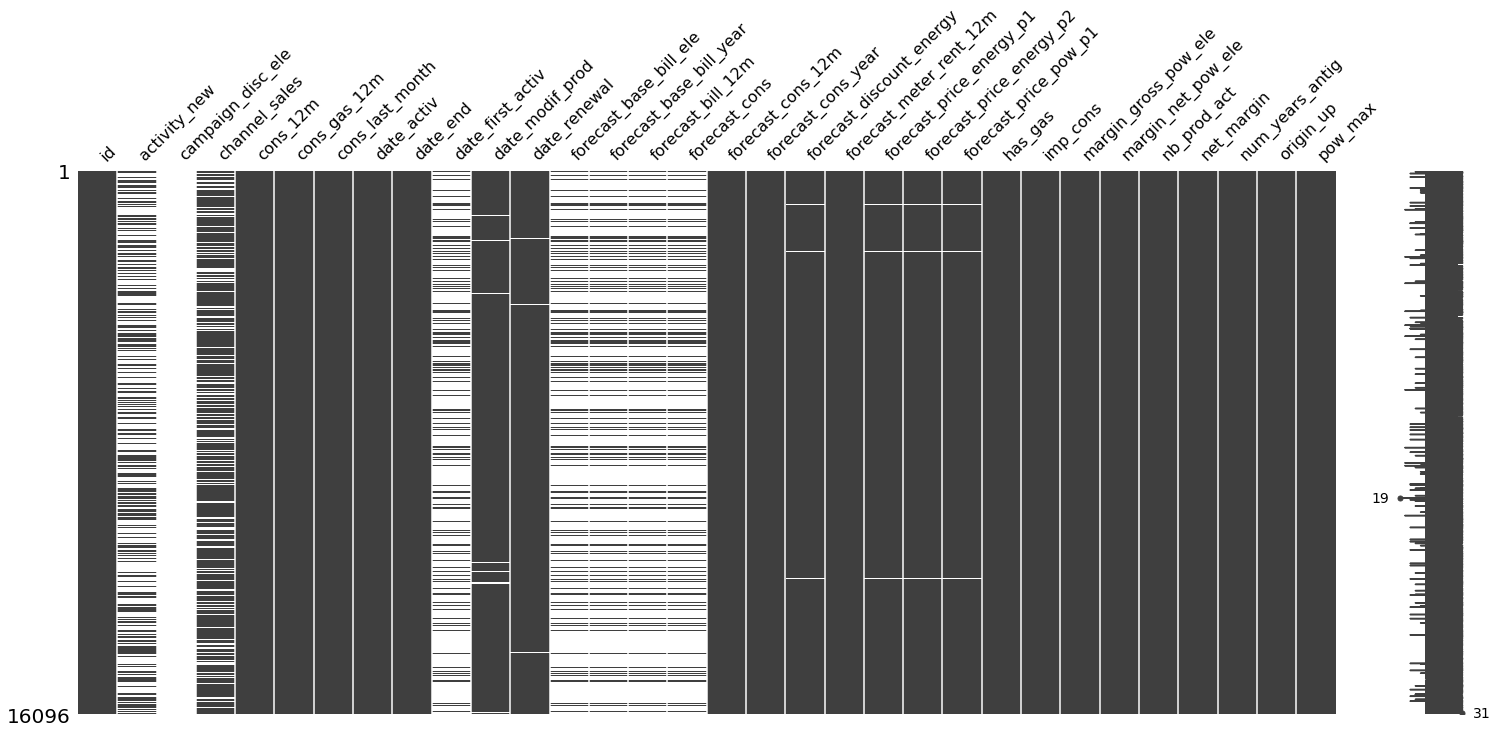

In [64]:
# Visualize the locations of the missing values of the dataset
msno.matrix(pco_main)

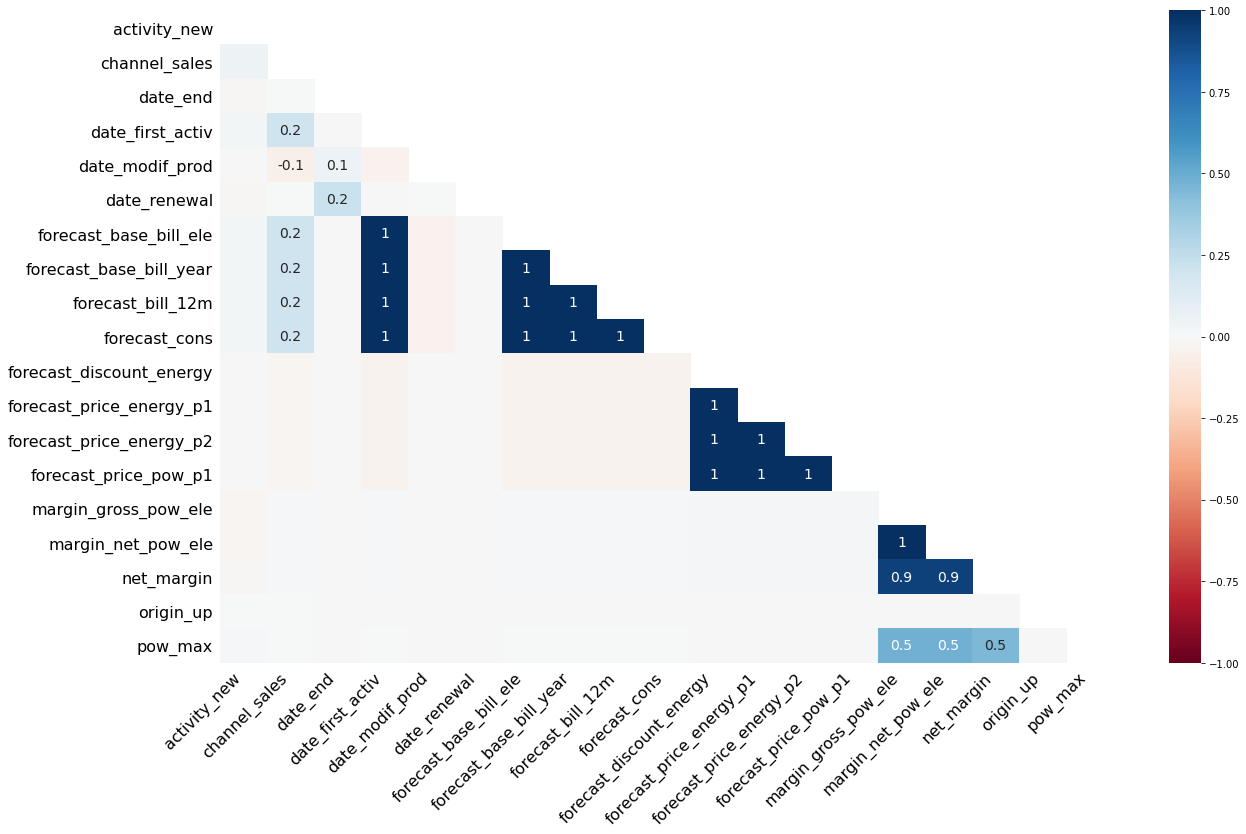

In [65]:
msno.heatmap(pco_main)

In [67]:

# Demonstrate why the date_activ column cannot replace completely date_first_activ
activity = ['date_activ','date_first_activ']

# Filter the columns of interest
pco_activity = pco_main[activity]

# Obtain only the complete cases
pco_activity_cc = pco_activity.dropna(subset=['date_first_activ'],how='any',inplace=False)



In [68]:
# Test whether two objects contain the same elements.
pco_activity_cc.date_activ.equals(pco_activity_cc.date_first_activ)

# Describe it
pco_activity_cc.describe(datetime_is_numeric=True) # Comparing dates in .describe() is depricated, might crash in the future

,date_activ,date_first_activ
count,3508,3508
unique,1097,1133
top,2012-02-01,2009-07-14
freq,31,34


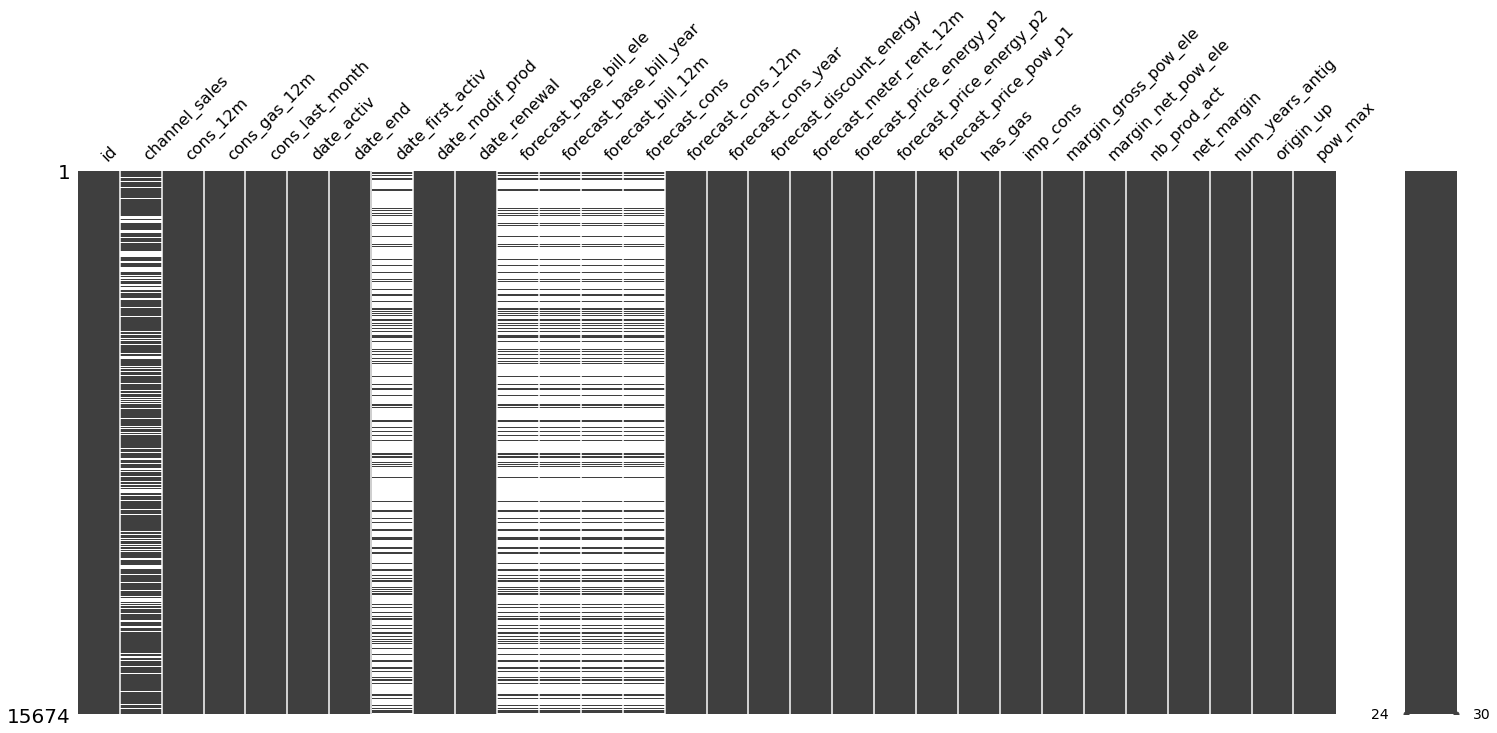

In [69]:
# Drop the column activity_new and campaign_disc_elec
pco_main_drop = pco_main.drop(labels= ['activity_new','campaign_disc_ele'] , axis=1)

# Remove date_end date_modif_prod date_renewal origin_up pow_max margin_gross_pow_ele margin_net_pow_ele net_margin
brush = ['date_end','date_modif_prod','date_renewal','origin_up','pow_max','margin_gross_pow_ele',
         'margin_net_pow_ele', 'net_margin','forecast_discount_energy','forecast_price_energy_p1',
         'forecast_price_energy_p2','forecast_price_pow_p1']
pco_main_drop.dropna(subset=brush, how='any',inplace=True)

msno.matrix(pco_main_drop)



###**Observations**
* The variable `activity_new` is **MCAR** and has very low correlation with any of the variables. We can safely *drop* this column. 
* The variable `campaign_disc_elec` is completely missing at random on all rows. We can get rid of this column. This suggests that subscribers are not subscribing through campaings offers. 
* The variable `date_first_activ` cannot be replace by the values of the `date_activ` variable. **MAR**
* `net_margin` is showing strong correlation between `margin_gross_pow_elec` and `margin_net_pow_ele`. Multicolinearity is likely here. 
* The variables `origin_up` and `pow_max` display no correlation with any variable and contain 0.54% and 0.01% of missingness respectively. These are **MCAR** and can be dropped listwise.
* `Forecast_base_bill_ele`, `forecast_base_bill_year`, `forecast_bill_12m` and `forecast_cons` variables are highly correlated with the `date_first_activ` variable's missingness. Accouting for 78% of missing values in the formerly mention columns and therfore are **MNAR**.
*Cannot replace the `date_first_activ` column with the `date_activ` column since in some of the cases the dates are not identical. 

In [70]:
# Choose the columns without missing values
incomplete_cols = ['channel_sales','date_first_activ','forecast_base_bill_ele','forecast_base_bill_year','forecast_bill_12m','forecast_cons']

complete_cols = [column_name for column_name in pco_main_drop.columns if column_name not in incomplete_cols]

pco_main_cc = pco_main_drop[complete_cols]

# Fix negative numeric variables
numeric = [column_name for column_name in pco_main_cc.columns
           if pco_main_cc[column_name].dtype == 'float64' 
           or pco_main_cc[column_name].dtype == 'int64']

# Overwrite positive values on negative values
pco_main_cc[numeric] = pco_main_cc[numeric].apply(abs)

# Describe
pco_main_cc.describe()


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max
count,1.567400e+04,1.567400e+04,1.567400e+04,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000
mean,1.916143e+05,3.132400e+04,1.941588e+04,2359.676441,1911.698354,0.976139,70.210965,0.135925,0.052858,43.522191,196.641669,23.556272,24.125235,1.348092,221.259158,5.052188,20.438270
std,6.724688e+05,1.716291e+05,8.226881e+04,3979.605687,5224.813531,5.124103,78.560454,0.026282,0.048638,5.221651,490.956048,22.456277,25.599218,1.475092,362.053657,1.670284,21.164053
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
25%,5.893250e+03,0.000000e+00,0.000000e+00,514.045000,0.000000,0.000000,16.230000,0.115237,0.000000,40.606701,0.000000,12.360000,12.360000,1.000000,52.802500,4.000000,12.500000
50%,1.522000e+04,0.000000e+00,9.090000e+02,1178.970000,382.000000,0.000000,19.430000,0.142881,0.086163,44.311378,44.870000,21.090000,21.090000,1.000000,120.545000,5.000000,13.856000
75%,4.953825e+04,0.000000e+00,4.131500e+03,2677.220000,1994.750000,0.000000,131.500000,0.146348,0.098837,44.311378,217.962500,29.640000,29.760000,1.000000,275.797500,6.000000,19.800000
max,1.609711e+07,4.154590e+06,4.538720e+06,103801.930000,175375.000000,50.000000,2411.690000,0.273963,0.195975,59.444710,15042.790000,525.540000,615.660000,32.000000,24570.650000,16.000000,500.000000


In [71]:
# Convert the has_gas column to  Yes/No
pco_main_cc['has_gas'] = pco_main_cc['has_gas'].replace({'t':'Yes','f':'No'})

# Merge the main dataset with the output dataset
pco_main_cc_merged = pco_main_cc.merge(right=pco_output,on=['id'])

# Convert the churn column to Churned/Stayed
pco_main_cc_merged['churn'] = pco_main_cc_merged['churn'].replace({1:'Churned',0:'Stayed'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [72]:
pco_main_cc_merged.head()

,id,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,48ada52261e7cf58715202705a0451c9,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,No,831.80,41.76,41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,Stayed
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,No,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,Stayed
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,No,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,Stayed
3,bba03439a292a1e166f80264c16191cb,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,No,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,Stayed
4,568bb38a1afd7c0fc49c77b3789b59a3,121335,0,12400,2010-04-08,2016-04-08,2010-04-08,2015-04-12,10865.02,12400,0.0,170.74,0.110083,0.093746,40.606701,No,1052.37,3.18,3.18,1,823.18,6,lxidpiddsbxsbosboudacockeimpuepw,75.000,Stayed


In [73]:
# Obtain all the variables except for id
variables = [column_name for column_name in pco_main_cc_merged.columns if column_name != 'id']

# Obtain all the categorical variables except for id
categorical = [column_name for column_name in variables if pco_main_cc_merged[column_name].dtype == 'object']

# Obtain all the Date Variables
dates = [column_name for column_name in variables if pco_main_cc_merged[column_name].dtype == 'datetime64[ns]']

# Obtain all the numeric columns
numeric = [column_name for column_name in variables
           if column_name not in categorical 
           and column_name != 'id'
           and column_name != 'churn'
           and column_name not in dates]

# **Data Visualization**

Let's visualize what we've found.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


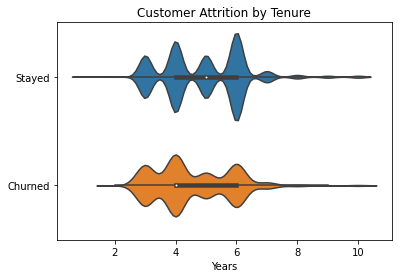

In [74]:
# Calculate the zcores of tenure
tenure_zcores = zscore(a=pco_main_cc_merged['num_years_antig'])
# Convert to absolute values
abs_tenure_zscores = np.abs(tenure_zcores)
# Extract Columns of interest
churn_tenure = pco_main_cc_merged[['churn','num_years_antig']]
# Add z-score column
churn_tenure['z_score'] = list(abs_tenure_zscores)
# Remove outliers 
churned_tenure_filtered = churn_tenure[churn_tenure['z_score'] < 3]
# Visualize tenure by retained customer and churner
vio = sns.violinplot( y=churned_tenure_filtered["churn"], x=churned_tenure_filtered["num_years_antig"] )
# Settings
vio.set(xlabel='Years', ylabel='')
vio.set_title("Customer Attrition by Tenure")
plt.show()

###**Facts**
* The median age of churners is 4 years
* Customers are more likely to churn during the 4th year than the 7th year
* The median age of retained customers is 5 years


##**The Main Dataset**

In [75]:
# Most popular electricty campaign
ele_nm = pco_main_cc_merged.loc[(pco_main_cc_merged['churn']>='Stayed') & (pco_main_cc_merged['net_margin']>0),['id', 'origin_up','net_margin']]

ele_nm.value_counts(subset=['origin_up'])

origin_up                       
lxidpiddsbxsbosboudacockeimpuepw    6584
kamkkxfxxuwbdslkwifmmcsiusiuosws    4188
ldkssxwpmemidmecebumciepifcamkci    3201
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
dtype: int64

In [76]:
# Highest netting electricity subscription campaign
print(ele_nm.groupby('origin_up')['net_margin'].agg('sum').sort_values(ascending=False))

origin_up
lxidpiddsbxsbosboudacockeimpuepw    1541159.95
ldkssxwpmemidmecebumciepifcamkci     814230.02
kamkkxfxxuwbdslkwifmmcsiusiuosws     717939.95
usapbepcfoloekilkwsdiboslwaxobdp        250.40
ewxeelcelemmiwuafmddpobolfuxioce         46.22
Name: net_margin, dtype: float64


### **Facts**
* The most popular electricity campaign is `lxidpiddsbxsbosboudacockeimpuepw` which has brought 6,584 current customers.
* The electricity campaign attributable to the highest total net margin is `lxidpiddsbxsbosboudacockeimpuepw`. Netting $1,541,159.95 in 2015.

## **Caveats**

In [78]:
# Select current customers with positive net margins
top_customers = pco_main_cc_merged.loc[(pco_main_cc_merged['churn']>='Stayed') & (pco_main_cc_merged['net_margin']>0),['id','num_years_antig','net_margin']]

# Top 10 customers by net margin
top_customers.sort_values(by=['net_margin'],ascending=False).head(10)

,id,num_years_antig,net_margin
11502,d00e8a9951b5551d8f02e45f9ed2b0dd,3,10203.50
6930,78bd1c5c0c67f2be6de89b19df5f8861,3,5625.14
13259,818b8bca0a9d7668252d46b978169325,4,4346.37
8378,a3a739686fbd5ba8b4a21ec835507b6d,4,4305.79
324,89b3406c3ba717f1b788ceeb5af9e8b9,3,4161.74
10100,93435ecb05910c7b87e0ae9dbedb2882,4,4148.99
12028,4519e6a8928a015819466fc9de0fa49e,3,4040.60
6405,933527d7a2f669af49075a2380c10ded,4,3744.72
6850,43580ef6cc40fcfd0a9b76eee17a267a,4,3716.78
13553,ee98a86efa759681cc59c7d4e0d0312f,4,3407.65
